In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,6]

### SVM - Support Vector Machine

Support Vector Machines é um excelente algoritmo de machine learning que exige de baixo poder computacional e ainda assim consegue uma boa acurácia.
O objetivo do algoritmo SVM é encontrar um hiperplano em um espaço N-dimensional  que (de maneira distinta) classifica os dados.

Os “Vetores de suporte” são simplesmente as coordenadas da observação
individual. Support Vector Machine é uma fronteira que melhor segrega as duas
classes (hiperplano / linha).

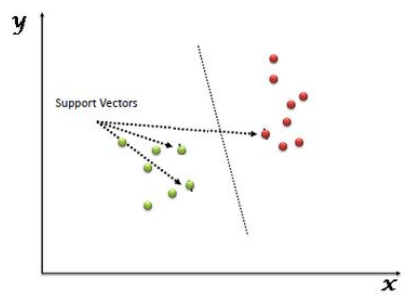
Imagem em: https://www.inf.ufpr.br/dagoncalves/IA07.pdf

Algumas vantagens do SVM são:

* Efetivo em espaços de alta dimensão.

* Ainda efetivo em casos onde o número de dimensões é maior do que o número de amostras.

* Usa um subconjunto de pontos de treino na decisão da função, então é também eficiente para memória

SVC, NuSVC e LinearSVC são classes capazer de realizar classificação binária e multi-classe em um dataset.
Saiba mais [aqui](https://scikit-learn.org/stable/modules/svm.html).

No exemplo abaixo, usaremos o dataset de Emprestimo em que desejamos prever, de acordo com dados disponíveis, se um cliente pagou ou não sua dívida.

In [4]:
#Carregamos o dataset
data = pd.read_csv('emprestimo.csv')
data

,salario,valor,periodo,pagou
0,2620.0,93000.0,60,0.0
1,7470.0,81000.0,60,0.0
2,1300.0,50000.0,48,0.0
3,4280.0,32000.0,12,1.0
4,4840.0,109000.0,12,0.0
...,...,...,...,...
195,7330.0,108000.0,48,0.0
196,4110.0,51000.0,24,0.0
197,6140.0,65000.0,12,0.0
198,7950.0,90000.0,12,1.0


In [5]:
X = data[['salario', 'valor']].values
y = data['pagou'].values

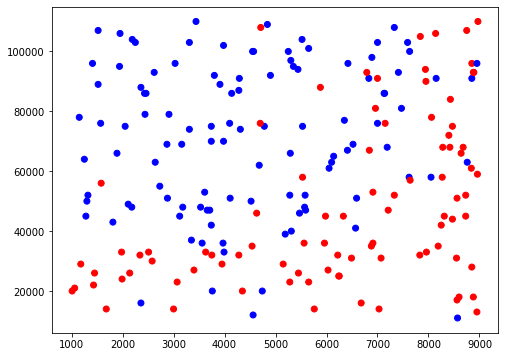

In [6]:
#Plotamos os Data points de acordo com a label 'pagou'
from matplotlib import colors
cmap = colors.ListedColormap(['blue', 'red'])
plt.scatter(data.salario, data.valor, c=y, cmap=cmap)

Realizamos a predição e separamos os dados com o hiperplano

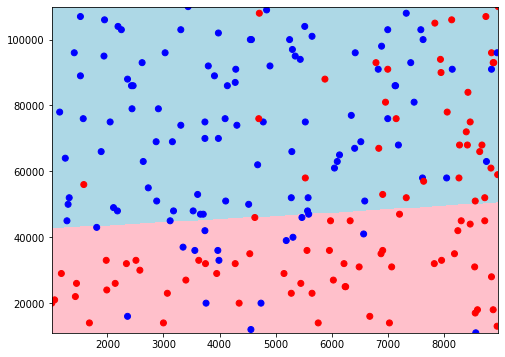

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

clf = SVC(C = 1)
clf.fit(X, y)

xg, yg = np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max(), 400),
                     np.linspace(X[:,1].min(), X[:,1].max(), 400))
#Usando o SVC realizamos a predição dos dados

Z = clf.predict(np.c_[xg.ravel(), yg.ravel()]).reshape(xg.shape)

cmapl = colors.ListedColormap(['lightblue', 'pink'])
cmap = colors.ListedColormap(['blue', 'red'])
plt.contourf(xg, yg, Z, cmap=cmapl)
plt.scatter(data.salario, data.valor, c=y, cmap=cmap)

### GridSearch + Regressão logística 


In [8]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..............................C=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..............................C=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..............................C=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..............................C=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..............................C=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   4.0s
[CV] END ...............................C=0.1, ke

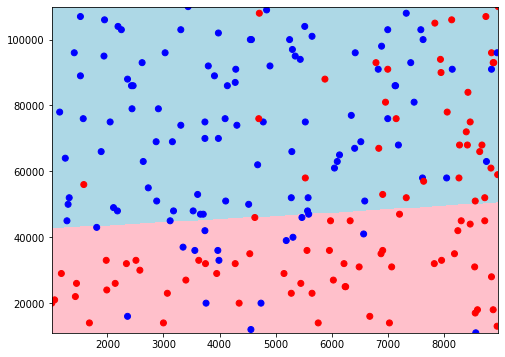

In [17]:
from sklearn.model_selection import GridSearchCV


params = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['rbf', 'sigmoid', 'linear']
}

Xtr, Xte, ytr, yte = train_test_split(X, y, random_state=0, test_size=0.4)

gs = GridSearchCV(SVC(), params, cv = 5, verbose=2)
gs.fit(Xtr, ytr)

y_pred = gs.predict(Xte)

print("\n Acurácia: ", accuracy_score(y_pred, yte))



xg, yg = np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max(), 400),
                     np.linspace(X[:,1].min(), X[:,1].max(), 400))
Z = clf.predict(np.c_[xg.ravel(), yg.ravel()]).reshape(xg.shape)

cmapl = colors.ListedColormap(['lightblue', 'pink'])
cmap = colors.ListedColormap(['blue', 'red'])
plt.contourf(xg, yg, Z, cmap=cmapl)
plt.scatter(data.salario, data.valor, c=y, cmap=cmap)

### Naive Bayes

Naive Bayes é um algoritmo e classificação para problemas classificação binária ou multi-classe baseado no Teorema de Bayes.
O Teorema de Bayes encontra a probabilidade de um evento ocorrer dada a probabilidade de um outro evento que já aconteceu. Esse teorema é apresentado matematicamente com a seguinte equação:




Vemos aqui como o algoritmo funciona para classificar a label (ŷ) de um novo evento (X = x1, x2, …, xn).
Partiremos do Teorema de Bayes expandido para o caso de n features
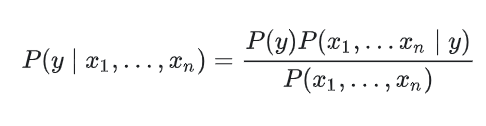

Abaixo temos uma simples aplicação do NaiveBayes
NB é a denotação de Naive Bayes e iremos aplicar sua forma Categórica e Gaussiana

Acurácia CategoricalNB: 0.6
Acurácia GaussianNB: 0.7375


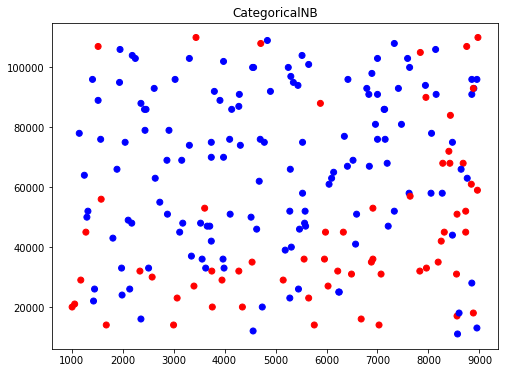

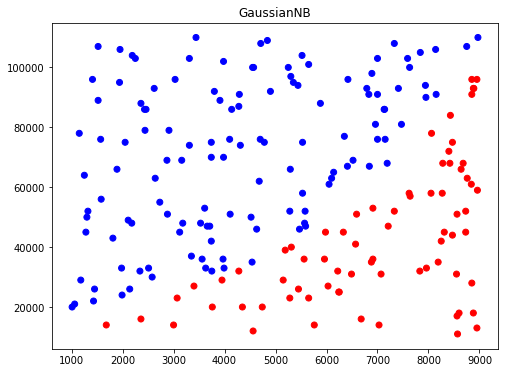

In [22]:
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

clf = CategoricalNB()
clf.fit(Xtr, ytr)

#Usando o CategoricalNB realizamos a predição dos dados
y_pred = clf.predict(Xte)

print('Acurácia CategoricalNB:', accuracy_score(y_pred, yte))

cmap = colors.ListedColormap(['blue', 'red'])
plt.scatter(data.salario, data.valor, c=clf.predict(X), cmap=cmap)
plt.title('CategoricalNB')

clf = GaussianNB()
clf.fit(Xtr, ytr)
y_pred = clf.predict(Xte)

print('Acurácia GaussianNB:', accuracy_score(y_pred, yte))

plt.figure()
cmap = colors.ListedColormap(['blue', 'red'])
plt.scatter(data.salario, data.valor, c=clf.predict(X), cmap=cmap)
plt.title('GaussianNB')
plt.show()

In [24]:
help(GaussianNB)

Help on class GaussianNB in module sklearn.naive_bayes:

class GaussianNB(_BaseNB)
 |  GaussianNB(*, priors=None, var_smoothing=1e-09)
 |  
 |  Gaussian Naive Bayes (GaussianNB)
 |  
 |  Can perform online updates to model parameters via :meth:`partial_fit`.
 |  For details on algorithm used to update feature means and variance online,
 |  see Stanford CS tech report STAN-CS-79-773 by Chan, Golub, and LeVeque:
 |  
 |      http://i.stanford.edu/pub/cstr/reports/cs/tr/79/773/CS-TR-79-773.pdf
 |  
 |  Read more in the :ref:`User Guide <gaussian_naive_bayes>`.
 |  
 |  Parameters
 |  ----------
 |  priors : array-like of shape (n_classes,)
 |      Prior probabilities of the classes. If specified the priors are not
 |      adjusted according to the data.
 |  
 |  var_smoothing : float, default=1e-9
 |      Portion of the largest variance of all features that is added to
 |      variances for calculation stability.
 |  
 |      .. versionadded:: 0.20
 |  
 |  Attributes
 |  ----------
 |  c